#Binary Integer Linear Programming
With the constraint Sx=b for vector x. Finding vector x which maximize c⋅x is so called binary integer linear programming

Let's connect constraint and cost function we can get

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_en/img/004_0.png?raw=1">



##Example
We prepared example below.
Now we have constrain as the 1st equation and try to maximize the 2nd equation.

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_en/img/004_1.png?raw=1">


##The first term
For the first term we create a constrain which satisfy Sx=b.
And this time we try to solve this constraint by using matrix A and solve b^2 - 2*b*A + A^2. We can remove constant term of b^2 and we just have to calculate -2*b*A+A^2

In [0]:
!pip install -U blueqat

In [0]:
import blueqat.wq as wq
import numpy as np
a = wq.Opt()

In [0]:
A = [[3,2,1],[5,2,3]]
b = [3,5]

a.qubo = np.zeros((3,3))

for i in range(len(b)):
  a.qubo += -2*b[i]*np.diag(A[i]) + wq.sqr(A[i])

print(a.qubo)


[[-34.  32.  36.]
 [  0. -24.  16.]
 [  0.   0. -26.]]


Now once we check the constraint

In [0]:
a.sa()

1.5176544189453125


[0, 1, 1]

In [0]:
a.sa()

1.5336260795593262


[1, 0, 0]

we got [0,1,1] or [1,0,0]

##The second term
And next we prepare for the second term

In [0]:
matrix2 = np.diag([1,2,1])
print(matrix2)

[[1 0 0]
 [0 2 0]
 [0 0 1]]


#create final QUBO
Now create a QUBO by adding the 1st and 2nd term as matrix

In [0]:
B = 1
a.qubo += - B * matrix2
a.sa()

1.5346970558166504


[0, 1, 1]

Finally we get [0,1,1].
Let's check the time evolution of cost function.

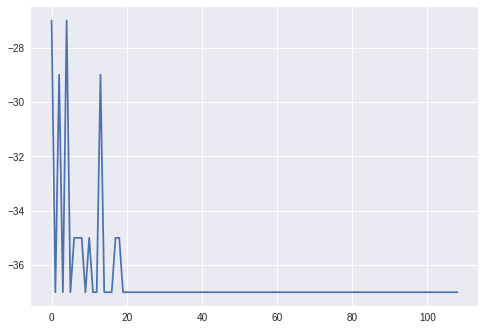

In [0]:
a.plot()